! kaggle competitions download -c tabular-playground-series-jan-2021
! mkdir input

! 7z e d:/git/intelligent-systems-practice/kaggle/tabular-playground-series-jan-2021.zip -od:/git/intelligent-systems-practice/kaggle/input

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
        
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
notebook_path = os.path.dirname(os.path.abspath("v1.ipynb"))+"\\"
input_path = notebook_path + 'input\\'
input_path

'd:\\git\\intelligent-systems-practice\\kaggle\\input\\'

In [3]:
train = pd.read_csv(input_path + 'train.csv', index_col='id')
display(train.head())

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [4]:
test = pd.read_csv(input_path + 'test.csv', index_col='id')
display(test.head())

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,
0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [5]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values = missing_values_table(train)

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


In [7]:
train.dtypes.value_counts()

float64    15
dtype: int64

In [23]:
train.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713
std,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238
min,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367
25%,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673
50%,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845
75%,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653
max,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506


In [10]:
correlations = train.corr()['target'].sort_values()
correlations

cont1    -0.032994
cont10   -0.021143
cont9    -0.013029
cont13   -0.006642
cont14   -0.006609
cont5    -0.005358
cont4     0.005522
cont8     0.014698
cont6     0.027955
cont12    0.047809
cont11    0.050996
cont3     0.058936
cont2     0.067102
cont7     0.067234
target    1.000000
Name: target, dtype: float64

In [14]:
target = train.pop("target")

<AxesSubplot:ylabel='Frequency'>

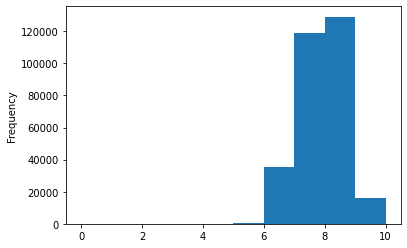

In [15]:
target.astype(int).plot.hist()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train, target, train_size=0.60)

In [69]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [27]:
data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

In [53]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.705149


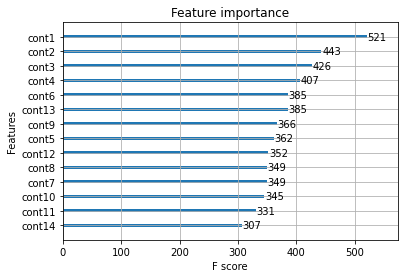

In [54]:
plot_importance(xg_reg)
plt.show()

In [55]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', reg_alpha=0.8)
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.704911


In [60]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', reg_alpha=0.8, booster='dart')
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.704720


In [65]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', reg_alpha=0.8, booster='dart', eta = 0.2, eval_metric = 'rmse')
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.703045


In [66]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', reg_alpha=0.95, booster='dart', eta = 0.2, eval_metric = 'rmse')
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.702992


In [160]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', reg_alpha=0.94, booster='dart', eta = 0.2, eval_metric = 'rmse', tree_method='hist')
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.702827


In [170]:
preds = xg_reg.predict(test)

In [185]:
my_df = pd.DataFrame(list(test.index), columns=['id'])
my_df['target'] = preds
my_df.to_csv('sub.csv', index=False)

In [95]:
from sklearn import linear_model

In [105]:
regr = linear_model.Ridge(0.95)
reg = regr.fit(X_train, y_train)
preds = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.726790


In [115]:
regr = linear_model.ElasticNet(1, 0.01, tol=1e-6)
reg = regr.fit(X_train, y_train)
preds = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.733689


In [132]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

In [128]:
def learning_curves(estimator, title, X, y, cv=None, train_sizes=np.linspace(.3, 1.0, 5)):
    train_sizes, train_scores, validation_scores = \
        learning_curve(estimator, 
                       X,
                       y,
                       train_sizes = train_sizes,
                       cv = cv, 
                       scoring = 'neg_mean_squared_error')

    train_scores_mean = np.sqrt(-np.mean(train_scores, axis=1))
    train_scores_std = np.sqrt(np.std(train_scores, axis=1))
    validation_scores_mean = np.sqrt(-np.mean(validation_scores, axis=1))
    validation_scores_std = np.sqrt(np.std(validation_scores, axis=1))
    
    plt.rcParams["font.size"] = 12
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",label = 'Validation error')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1,
                     color="g")
    
    plt.rcParams["font.size"] = 10
    plt.ylabel('RMSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = title
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0.5,0.8)

In [129]:
params_xgb = {'lambda': 1,
 'alpha': 0,
 'colsample_bytree': 1,
 'subsample': 1,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 3,
 'random_state': 48}

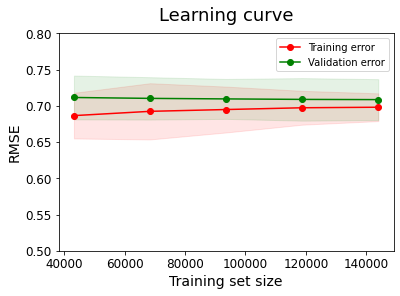

In [133]:
model_xgb = xgb.XGBRegressor(**params_xgb)
title = 'Learning curve'
learning_curves(model_xgb, title, X_train, y_train, cv=5)

In [134]:
model_xgb.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.703281


In [144]:
params_xgb = {'lambda': 0.95,
 'alpha': 0.1,
 'colsample_bytree': 0.5,
 'subsample': 0.6,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 3,
 'objective': 'reg:squarederror',
 'booster': 'dart',
 'eta': 0.2,
 'eval_metric': 'rmse',
 'tree_method': 'hist'}
model_xgb = xgb.XGBRegressor(**params_xgb)
model_xgb.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.703281


In [149]:
from sklearn.ensemble import RandomForestRegressor

In [159]:
regr = RandomForestRegressor(criterion='mse', max_depth=5, max_features='sqrt', oob_score=True)
regr.fit(X_train, y_train)
preds = regr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.720700


In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
clf = LogisticRegression().fit(X_train, y_train)
preds = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

ValueError: Unknown label type: 'continuous'

In [ ]:
preds = clf.predict_proba(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [ ]:
clf.score(X_train, y_train)